<a href="https://colab.research.google.com/github/moustafa-7/PyTorch-Course/blob/master/Logistic_Regression_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [5]:
train_dset = dsets.MNIST(root = './data', train = True,
                         transform = transforms.ToTensor(), download = True)

0it [00:00, ?it/s]

9920512it [00:04, 2080422.45it/s]                             


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 57380.49it/s]                           
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:01, 859332.09it/s]                             
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 21913.73it/s]            

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [6]:
len(train_dset)

60000

In [7]:
(train_dset[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [8]:
train_dset[0][1]

5

In [9]:
type(train_dset[0])

tuple

## Showing the Dataset

In [0]:
 import matplotlib.pyplot as plt
 %matplotlib inline

import numpy as np

In [11]:
train_dset[0][0].numpy().shape

(1, 28, 28)

In [0]:
show_img = train_dset[0][0].numpy().reshape(28,28)

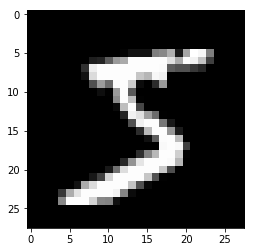

In [13]:
plt.imshow(show_img, cmap = 'gray')

## Load the test dataset

In [0]:
test_dset = dsets.MNIST(root = './data', train = False,
                        transform = transforms.ToTensor(), download = True)

In [16]:
len(test_dset)

10000

## Now make the dataset iterable

In [18]:
len(train_dset)

60000

In [0]:
batch_size = 100

In [0]:
n_iters = 3000

In [0]:
num_epochs = n_iters / (len(train_dset) / batch_size)
num_epochs = int(num_epochs)

## Create iterable object  (Data loader)

In [0]:
train_loader = torch.utils.data.DataLoader(dataset = train_dset,
                                          batch_size = batch_size,
                                          shuffle = True)

### check iterability

In [24]:
import collections
isinstance(train_loader, collections.Iterable)

True

In [0]:
 test_loader = torch.utils.data.DataLoader(dataset = test_dset,
                                          batch_size = batch_size,
                                          shuffle = False)

## Now Build the model

In [0]:
class logistic_regression_model(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(logistic_regression_model, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)
    
    
  def forward(self, x):
    out = self.linear(x)
    return out

In [0]:
input_dim = 28*28
output_dim = 10

model = logistic_regression_model(input_dim, output_dim)

In [0]:
criterion = nn.CrossEntropyLoss()

In [0]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

## Let's Check the parameters ourselves

### you have to put this in the form of list to be able to measure its length

In [33]:
print(len(list(model.parameters())))

2


In [36]:
print(list(model.parameters())[0].size)

<built-in method size of Parameter object at 0x7fd306087708>


In [52]:
iter = 0
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = Variable(images.view(-1,28*28))
    
    labels = Variable(labels)
    
    optimizer.zero_grad()
    
    outputs = model(images)
    
    loss = criterion(outputs, labels)
    
    loss.backward()
    
    optimizer.step()
    
    iter = iter + 1
    
    if iter % 500 == 0:
      correct = 0
      total = 0
      
      for images, labels in test_loader:
        images = Variable(images.view(-1,28*28))
        outputs = model(images)
        
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        
        correct += (predicted == labels).sum()
        
      accuracy  = 100 * correct / total
      
      print('Iteration: {}. Loss: {}. Accuracy: {}' .format(iter, loss.data, accuracy))
        
      

Iteration: 500. Loss: 0.8651614189147949. Accuracy: 84
Iteration: 1000. Loss: 0.8191596865653992. Accuracy: 84
Iteration: 1500. Loss: 0.8949123620986938. Accuracy: 85
Iteration: 2000. Loss: 0.7722031474113464. Accuracy: 85
Iteration: 2500. Loss: 0.734147846698761. Accuracy: 85
Iteration: 3000. Loss: 0.8547019958496094. Accuracy: 85
